In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
anime = pd.read_csv("./anime_data/anime.csv")
rating = pd.read_csv("./anime_data/rating.csv")

In [4]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [5]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [6]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [7]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [8]:
anime.describe(include=object)

,name,genre,type,episodes
count,12294,12232,12269,12294
unique,12292,3264,6,187
top,Shi Wan Ge Leng Xiaohua,Hentai,TV,1
freq,2,823,3787,5677


In [9]:
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [10]:
anime.dropna(axis = 0,inplace = True)

In [11]:
anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [12]:
anime.duplicated().sum()

0

In [13]:
rating.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [14]:
rating.duplicated().sum()

1

In [15]:
rating.drop_duplicates(keep='first',inplace=True)

In [16]:
rating.duplicated().sum()

0

In [17]:
fulldata = pd.merge(anime,rating,on="anime_id")

In [18]:
fulldata.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


In [19]:
fulldata = fulldata.rename(columns={
    "rating_x": "rating",
    "rating_y": "user_rating"
})


In [20]:
fulldata.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


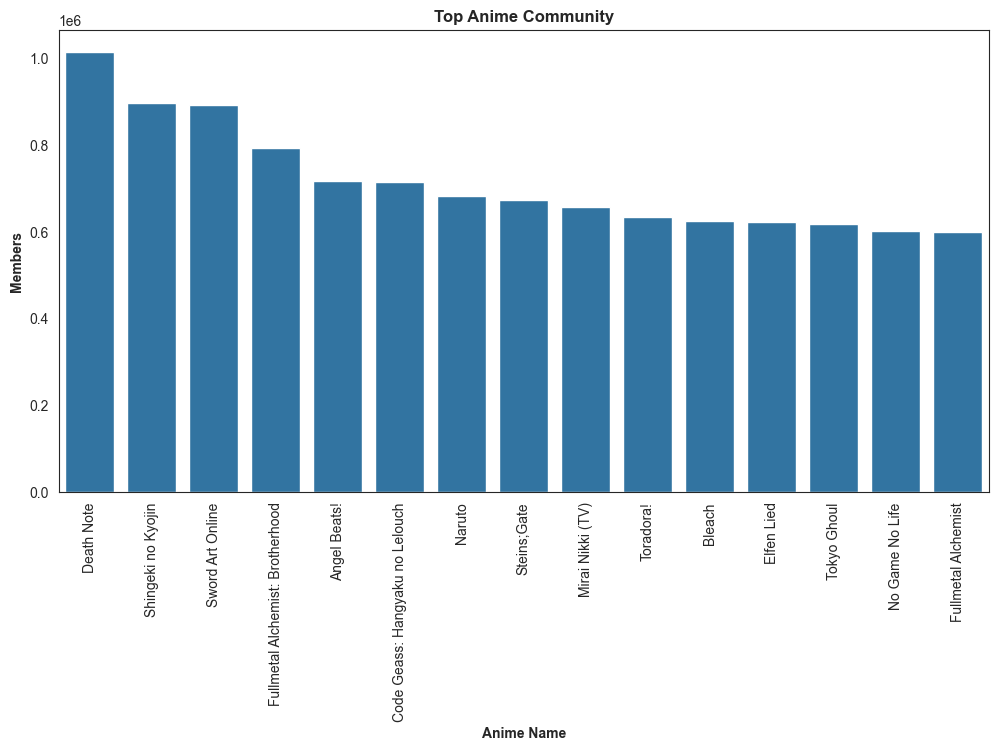

In [21]:
top_anime = fulldata.sort_values(["members"],ascending=False)
top_anime.drop_duplicates(subset ="name", keep = "first", inplace = True)
plt.figure(figsize=(12,6))
axis1 = sns.barplot(x=top_anime['name'].head(15),y=top_anime['members'].head(15), data=top_anime)
plt.title('Top Anime Community', weight='bold')
plt.xlabel('Anime Name', weight='bold')
plt.ylabel('Members', weight='bold')
plt.xticks(rotation = 90)
plt.savefig('top anime community.png')

In [22]:
top_anime["type"].value_counts()

type
TV         3402
OVA        3089
Movie      2112
Special    1581
ONA         526
Music       451
Name: count, dtype: int64

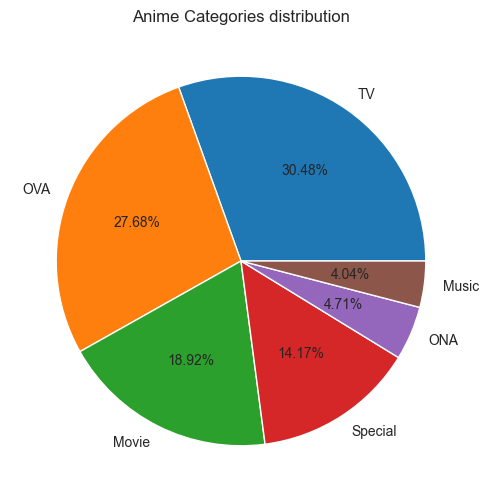

<Figure size 640x480 with 0 Axes>

In [23]:
plt.subplots(figsize=(6,6))
labels='TV', 'OVA', 'Movie', 'Special', 'ONA', 'Music'
sizes = [
    len(top_anime[top_anime["type"] == "TV"]),
    len(top_anime[top_anime["type"] == "OVA"]),
    len(top_anime[top_anime["type"] == "Movie"]),
    len(top_anime[top_anime["type"] == "Special"]),
    len(top_anime[top_anime["type"] == "ONA"]),
    len(top_anime[top_anime["type"] == "Music"]),
]
plt.pie(sizes,labels=labels, autopct='%1.2f%%')
plt.title("Anime Categories distribution")
#plt.legend()
plt.show()
plt.savefig('Anime Categories Distribution.png')

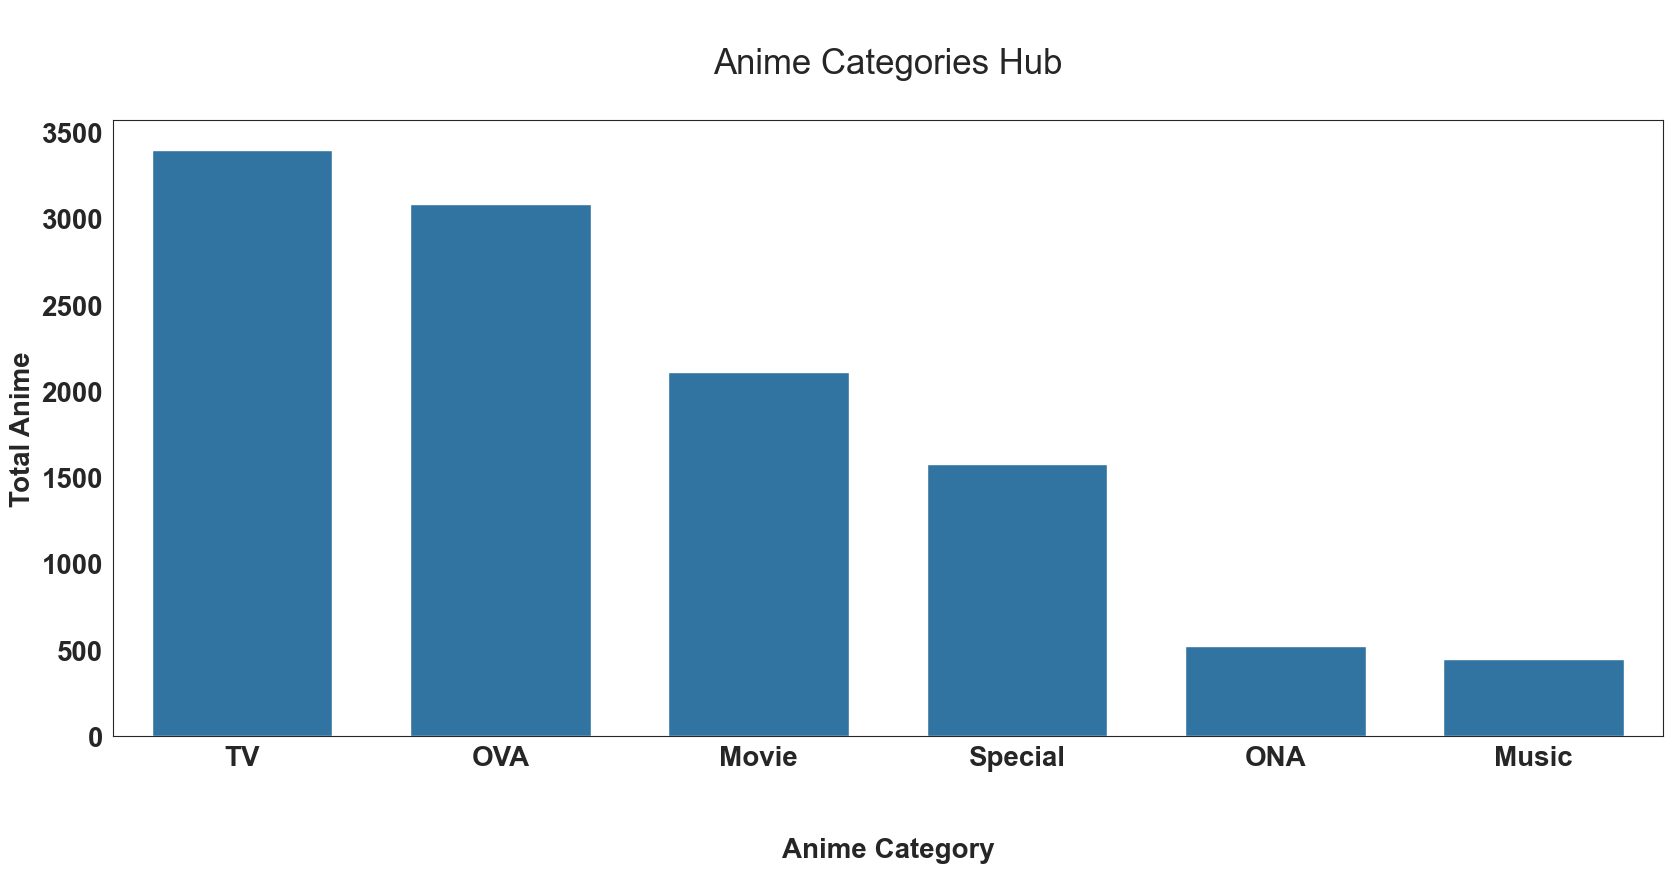

<Figure size 640x480 with 0 Axes>

In [24]:
plt.subplots(figsize=(20, 8))
p = sns.countplot(x=top_anime["type"], order=top_anime["type"].value_counts().index, width=0.7)
p.axes.set_title("\nAnime Categories Hub\n", fontsize=25)
plt.ylabel("Total Anime", fontsize=20, weight='bold')
plt.xlabel("\n\nAnime Category", fontsize=20, weight='bold')
plt.xticks(rotation=0, fontsize=20, weight='bold' )
plt.yticks(fontsize=20, weight='bold')
plt.show()
plt.savefig('Anime Categories Hub.png')

In [25]:
top_anime_rating = top_anime.sort_values(["rating"],ascending=False)

In [26]:
top_anime_rating.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
7688010,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62,48766,-1
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
21982,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,59192,-1
27977,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,64494,10
7689569,26313,Yakusoku: Africa Mizu to Midori,"Drama, Kids",OVA,1,9.25,53,48766,-1


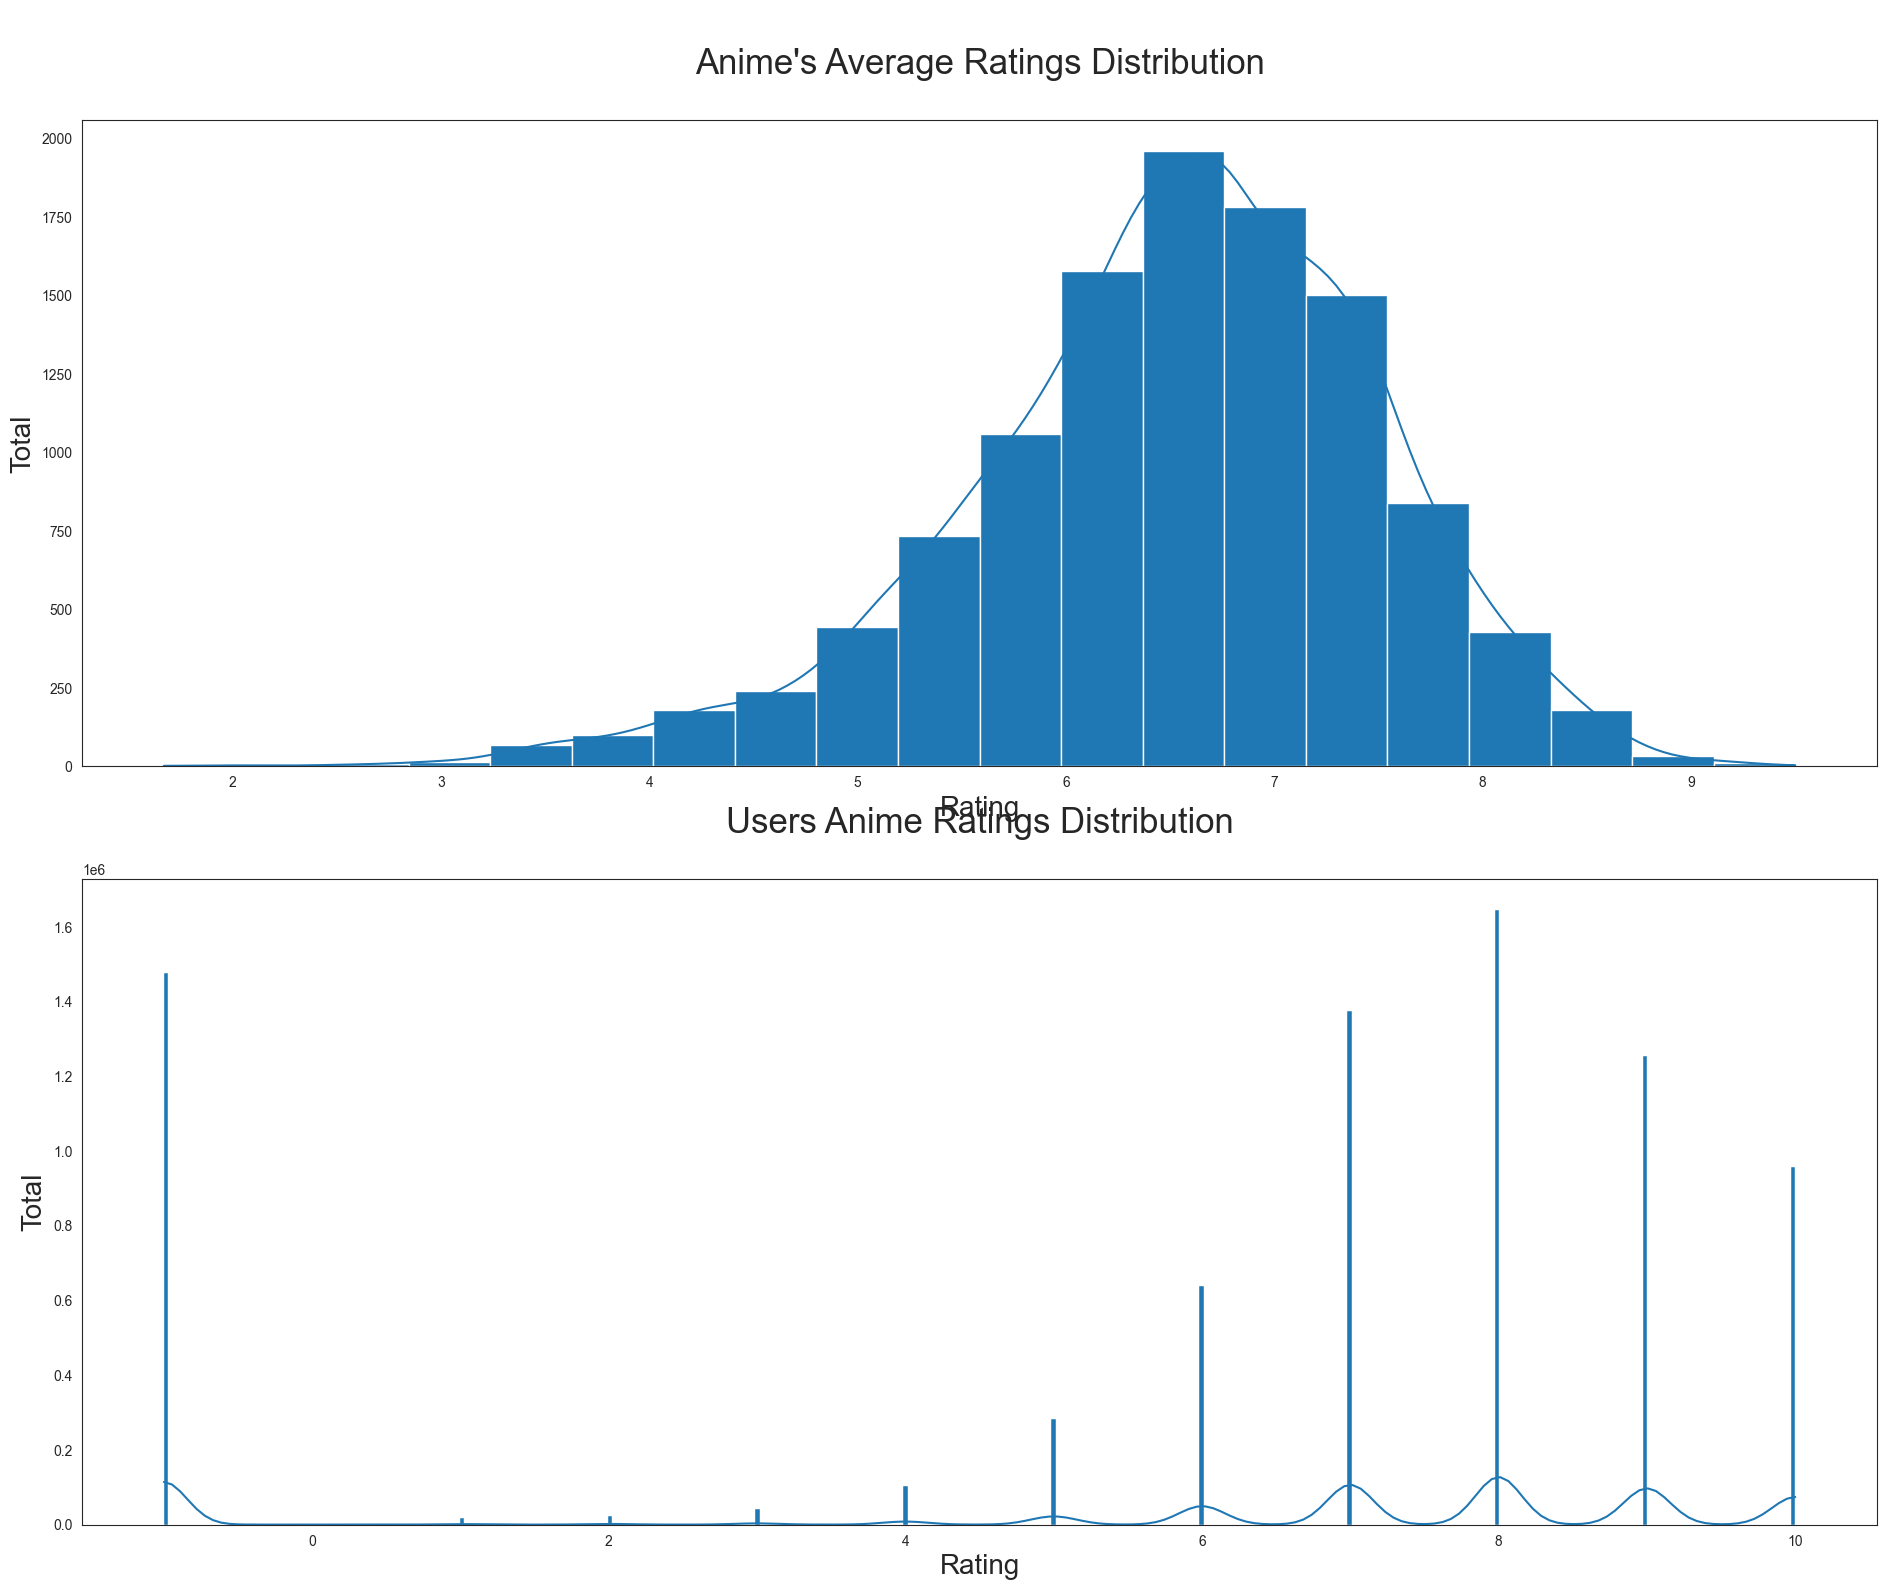

In [27]:
top_anime_temp2 = top_anime.sort_values(["rating"], ascending=False)

_, axs = plt.subplots(2, 1, figsize=(20, 16), sharex=False, sharey=False)
plt.tight_layout(pad=6.0)

sns.histplot(top_anime_temp2["rating"], kde=True, ax=axs[0], bins=20, alpha=1, fill=True)
axs[0].set_title("\nAnime's Average Ratings Distribution\n", fontsize=25)
axs[0].set_xlabel("Rating\n", fontsize=20)
axs[0].set_ylabel("Total", fontsize=20)

sns.histplot(fulldata["user_rating"], kde=True, ax=axs[1], bins="auto", alpha=1, fill=True)
axs[1].set_title("\n\n\n\n\nUsers Anime Ratings Distribution\n", fontsize=25)
axs[1].set_xlabel("Rating", fontsize=20)
axs[1].set_ylabel("Total", fontsize=20)

plt.show()
